In [15]:
import os
import pandas as pd

from os.path import join, basename, isdir, isfile, exists
from pathlib import Path

In [2]:
fear_label = 'fear'
contempt_label = 'contempt'  # disgust
happiness_label = 'happiness'
anger_label = 'anger'
sadness_label = 'sadness'
neutral_label = 'neutral'
surprise_label = 'surprise'
calm_label = 'calm'

In [16]:
meld_dir = r'I:\Datasets\meld\train_splits\wav'
train_files_path = r'I:\Datasets\meld\train_splits'
train_info_path = r'I:\Datasets\meld\train_sent_emo.csv'

In [30]:
train_info = pd.read_csv(train_info_path)

In [27]:
train_info.head(2)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"


Column Name  | Description 

Sr No.       | Serial numbers of the utterances mainly for referencing the utterances in case of different versions or multiple copies with different subsets. 

Utterance    | Individual utterances from EmotionLines as a string.

Speaker      | Name of the speaker associated with the utterance. 

Emotion      | The emotion (neutral, joy, sadness, anger, surprise, fear, disgust)

Sentiment    | The sentiment (positive, neutral, negative) expressed by the speaker in the utterance.

Dialogue_ID  | The index of the dialogue starting from 0.       

Utterance_ID | The index of the particular utterance in the dialogue starting from 0.     

StartTime    | The starting time of the utterance in the given episode in the format 'hh:mm:ss,ms'. 

StartTime    | The starting time of the utterance in the given episode in the format 'hh:mm:ss,ms'. 

In [31]:
train_filenames = [f for f in os.listdir(train_files_path) if isfile(join(train_files_path, f))]


In [32]:
train_filenames[:5]

['dia0_utt0.mp4',
 'dia0_utt1.mp4',
 'dia0_utt10.mp4',
 'dia0_utt11.mp4',
 'dia0_utt12.mp4']

In [33]:
#emotion - file path
#add file column to train info ("dia{Dialogue_ID}_urr{Utterance_ID}.ext")
#emotion from train_info, path from dir+train_filenames

In [34]:
filenames = []
for i, row in train_info.iterrows():
    filenames.append(f'{meld_dir}\dia{row.Dialogue_ID}_utt{row.Utterance_ID}.wav')

print(len(filenames) == len(train_info))

True


In [35]:
train_info.insert(7, 'path', filenames)
train_info.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,path,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,I:\Datasets\meld\train_splits\wav\dia0_utt0.wav,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,I:\Datasets\meld\train_splits\wav\dia0_utt1.wav,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,I:\Datasets\meld\train_splits\wav\dia0_utt2.wav,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,I:\Datasets\meld\train_splits\wav\dia0_utt3.wav,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,I:\Datasets\meld\train_splits\wav\dia0_utt4.wav,8,21,"00:16:34,452","00:16:40,917"


In [37]:
for i, row in train_info.iterrows():
    if not exists(row.path):
        print(f'file does not exist: {row.path}')


file does not exist: I:\Datasets\meld\train_splits\wav\dia125_utt3.wav


In [43]:
i = train_info[(train_info.path == r'I:\Datasets\meld\train_splits\wav\dia125_utt3.wav')].index
train_info_valid = train_info.drop(i)
print(len(train_info) - len(train_info_valid) == 1)

True


In [44]:
meld_df = train_info_valid[['Emotion', 'path']].copy()
meld_df = meld_df.rename(columns={'Emotion': 'emotion'})

In [46]:
for i, row in meld_df.iterrows():
    if not exists(row.path):
        print(f'file does not exist: {row.path}')

In [48]:
meld_df.head()

,emotion,path
0,neutral,I:\Datasets\meld\train_splits\wav\dia0_utt0.wav
1,neutral,I:\Datasets\meld\train_splits\wav\dia0_utt1.wav
2,neutral,I:\Datasets\meld\train_splits\wav\dia0_utt2.wav
3,neutral,I:\Datasets\meld\train_splits\wav\dia0_utt3.wav
4,surprise,I:\Datasets\meld\train_splits\wav\dia0_utt4.wav


In [50]:
meld_df.to_csv('meld_df.csv', index=False)

In [51]:
import seaborn as sns

<Axes: xlabel='emotion', ylabel='Count'>

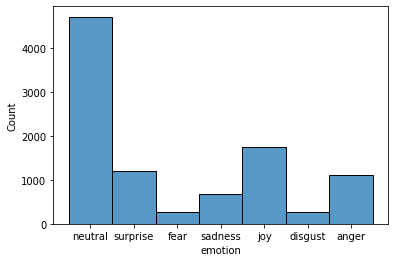

In [52]:
sns.histplot(meld_df, x='emotion')

In [53]:
meld_df.emotion.value_counts()

neutral     4709
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: emotion, dtype: int64

In [54]:
meld_crop_df = meld_df[(meld_df.emotion != 'joy')]

In [55]:
meld_crop_df.emotion.value_counts()

neutral     4709
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: emotion, dtype: int64

In [63]:
meld_crop_df = meld_crop_df.groupby(['emotion']).head(1000).reset_index(drop=True)

<Axes: xlabel='emotion', ylabel='Count'>

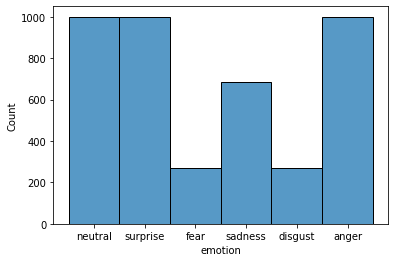

In [64]:
sns.histplot(meld_crop_df, x='emotion')


In [65]:
meld_crop_df.to_csv('meld_crop_df.csv', index=False)